In [1]:
import os

# Print current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\AI-projects\Codveda-DataScience-Internship-Level3\src\Task1_TimeSeries


In [2]:
"""
time_series_analysis.py
Performs time series analysis on cleaned sentiment data
(likes and retweets) and saves visualizations and forecast results.
"""

import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# ============================
# Paths (relative to current script location)
# ============================
input_path = "../../data/processed/cleaned_sentiment.csv"
output_dir = "../../outputs/Task1_TimeSeries"
os.makedirs(output_dir, exist_ok=True)

# Check if file exists
if not os.path.exists(input_path):
    raise FileNotFoundError(f"Cleaned data file not found at {input_path}")

✅ Data loaded for time series analysis:
            retweets  likes
timestamp                  
2010-05-15      20.0   40.0
2010-05-16       0.0    0.0
2010-05-17       0.0    0.0
2010-05-18       0.0    0.0
2010-05-19       0.0    0.0


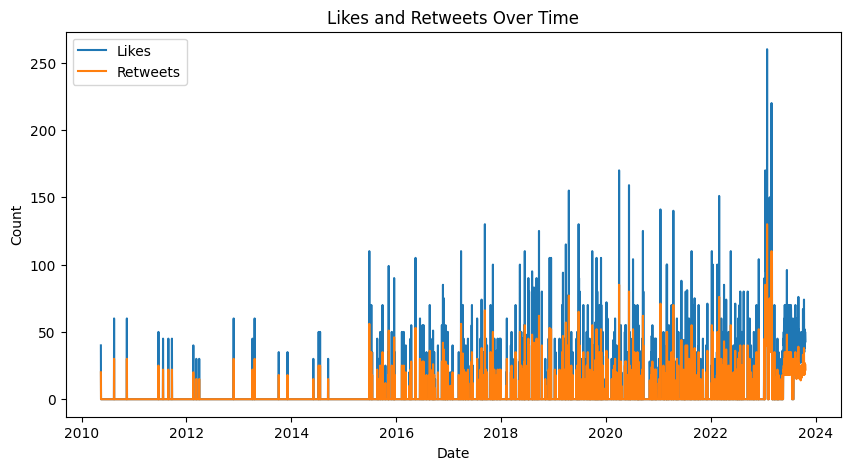

In [3]:
# ============================
# 1. Load data
# ============================
df = pd.read_csv(input_path, parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)
print("✅ Data loaded for time series analysis:")
print(df.head())

# ============================
# 2. Plot raw time series
# ============================
plt.figure(figsize=(10,5))
plt.plot(df['likes'], label="Likes")
plt.plot(df['retweets'], label="Retweets")
plt.title("Likes and Retweets Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.savefig(os.path.join(output_dir, "time_series_plot.png"))
plt.show()
plt.close()

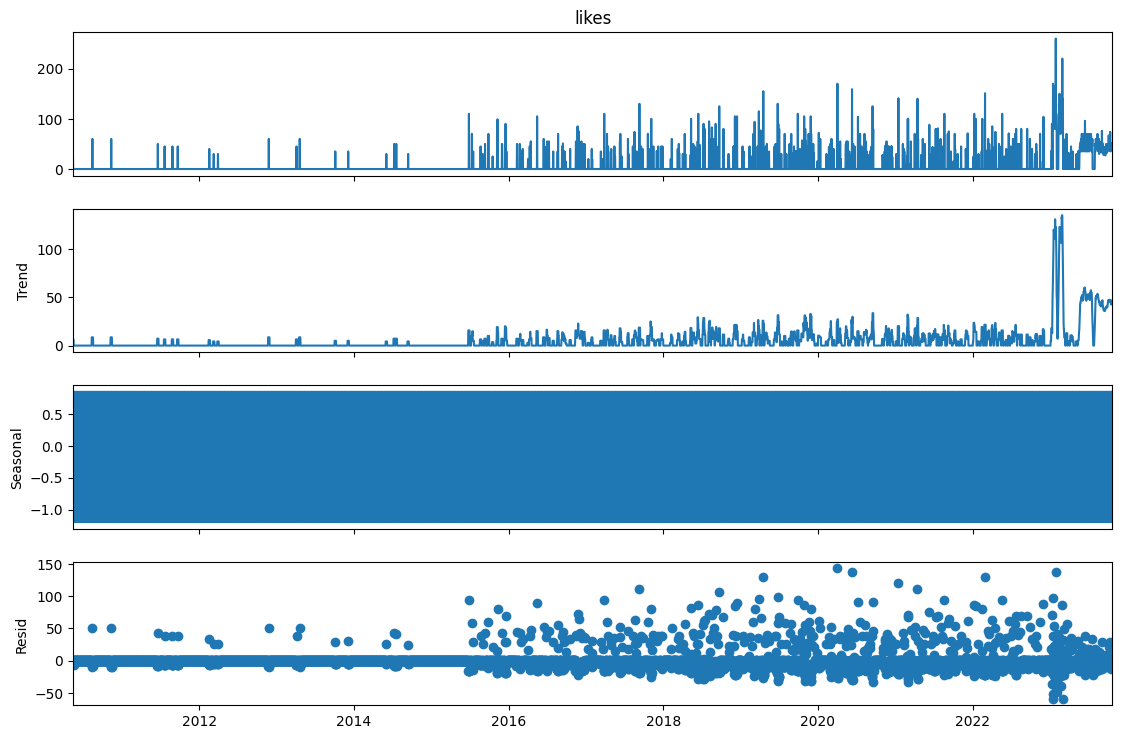

In [4]:
# ============================
# 3. Decompose time series (likes example)
# ============================
result = seasonal_decompose(df['likes'], model='additive', period=7)  # weekly seasonality
fig = result.plot()
fig.set_size_inches(12, 8)
plt.savefig(os.path.join(output_dir, "likes_decomposition.png"))
plt.show()
plt.close()

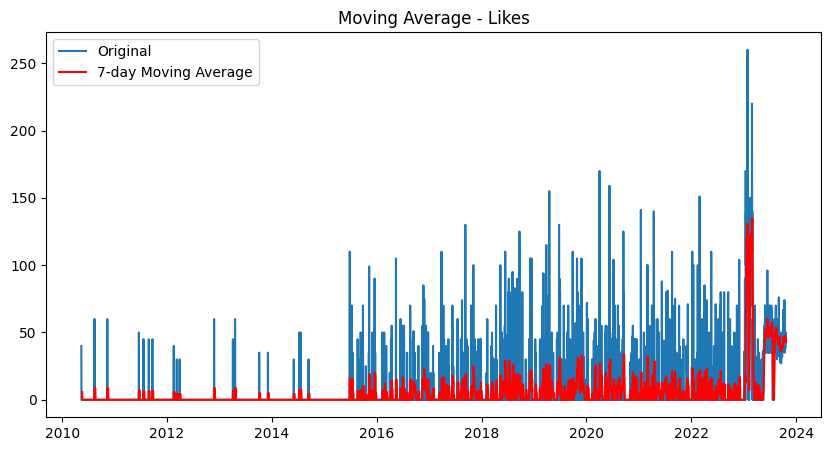

In [5]:
# ============================
# 4. Moving Average & Exponential Smoothing
# ============================
# Moving Average
df['likes_ma7'] = df['likes'].rolling(window=7).mean()
plt.figure(figsize=(10,5))
plt.plot(df['likes'], label="Original")
plt.plot(df['likes_ma7'], label="7-day Moving Average", color='red')
plt.title("Moving Average - Likes")
plt.legend()
plt.savefig(os.path.join(output_dir, "likes_moving_average.png"))
plt.show()
plt.close()

d:\AI-projects\Codveda-DataScience-Internship-Level3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


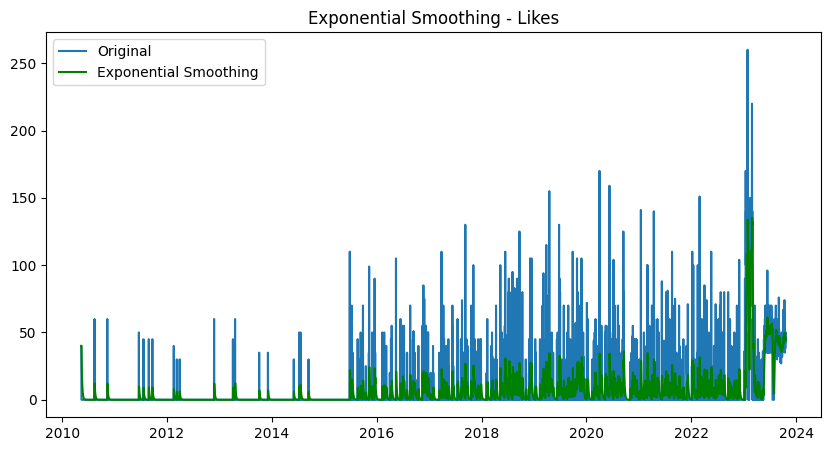

In [6]:
# Exponential Smoothing
model = SimpleExpSmoothing(df['likes']).fit(smoothing_level=0.2, optimized=False)
df['likes_ses'] = model.fittedvalues
plt.figure(figsize=(10,5))
plt.plot(df['likes'], label="Original")
plt.plot(df['likes_ses'], label="Exponential Smoothing", color='green')
plt.title("Exponential Smoothing - Likes")
plt.legend()
plt.savefig(os.path.join(output_dir, "likes_exponential_smoothing.png"))
plt.show()
plt.close()

d:\AI-projects\Codveda-DataScience-Internship-Level3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\AI-projects\Codveda-DataScience-Internship-Level3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\AI-projects\Codveda-DataScience-Internship-Level3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📊 ARIMA RMSE: 33.53


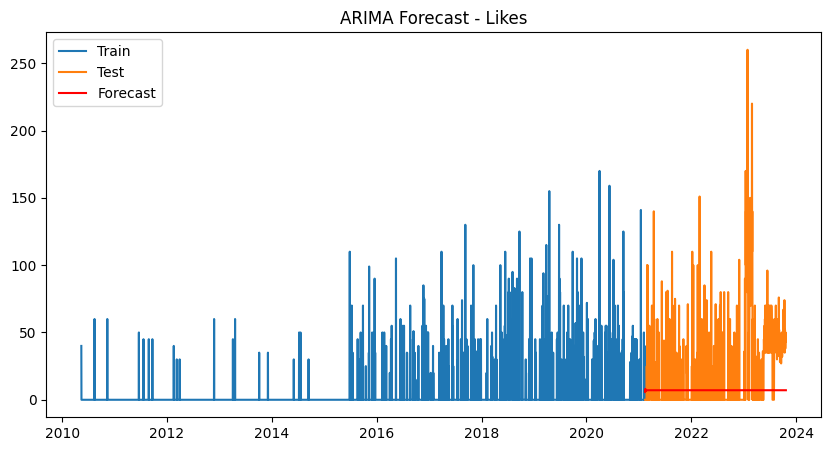

In [7]:
# 5. ARIMA Forecasting
# ============================
# Train/Test Split
train_size = int(len(df) * 0.8)
train, test = df['likes'][:train_size], df['likes'][train_size:]

# Build ARIMA model
arima_model = ARIMA(train, order=(2,1,2))  # (p,d,q) can be tuned
arima_fit = arima_model.fit()

# Forecast
forecast = arima_fit.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"📊 ARIMA RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast - Likes")
plt.legend()
plt.savefig(os.path.join(output_dir, "likes_arima_forecast.png"))
plt.show()
plt.close()


In [8]:
# ============================
# 6. Save Forecast Results
# ============================
forecast_df = pd.DataFrame({
    "timestamp": test.index,
    "actual": test.values,
    "forecast": forecast.values
})
forecast_df.to_csv(os.path.join(output_dir, "likes_arima_forecast.csv"), index=False)

print("✅ Time series analysis completed. All visualizations/results saved in:", output_dir)

✅ Time series analysis completed. All visualizations/results saved in: ../../outputs/Task1_TimeSeries
